# Data Normalization 数据规范化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
age=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
salary=pd.DataFrame([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000000])


# Min-Max normalization 最小最大规范化

In [3]:
mms = MinMaxScaler()


In [4]:
age_mms=mms.fit_transform(age)


In [5]:
age_mms = pd.DataFrame(age_mms,columns=['age'])
age_mms.describe()

,age
count,10.000000
mean,0.500000
std,0.336406
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000


In [6]:
age_mms.round(2)

,age
0,0.00
1,0.11
2,0.22
3,0.33
4,0.44
5,0.56
6,0.67
7,0.78
8,0.89
9,1.00


In [7]:
salary_mms=mms.fit_transform(salary)

In [8]:
salary_mms = pd.DataFrame(salary_mms,columns=['salary'])
salary_mms.describe()

,salary
count,10.000000
mean,0.100360
std,0.316101
min,0.000000
25%,0.000225
50%,0.000450
75%,0.000675
max,1.000000


In [9]:
salary_mms.round(2)

,salary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


# z-score normalization z-score规范化(零均值规范化）


In [10]:
sc = StandardScaler()


In [11]:
age_sc=sc.fit_transform(age)

In [12]:
age_sc = pd.DataFrame(age_sc,columns=['age'])
age_sc.describe()

,age
count,1.000000e+01
mean,-1.110223e-16
std,1.054093e+00
min,-1.566699e+00
25%,-7.833495e-01
50%,0.000000e+00
75%,7.833495e-01
max,1.566699e+00


In [13]:
age_sc.round(2)

,age
0,-1.57
1,-1.22
2,-0.87
3,-0.52
4,-0.17
5,0.17
6,0.52
7,0.87
8,1.22
9,1.57


In [14]:
salary_sc=sc.fit_transform(salary)

In [15]:
salary_sc = pd.DataFrame(salary_sc,columns=['salary'])
salary_sc.describe()

,salary
count,10.000000
mean,0.000000
std,1.054093
min,-0.334667
25%,-0.333917
50%,-0.333166
75%,-0.332416
max,2.999999


In [16]:
salary_sc.round(2)

,salary
0,-0.33
1,-0.33
2,-0.33
3,-0.33
4,-0.33
5,-0.33
6,-0.33
7,-0.33
8,-0.33
9,3.00


In [17]:
data = pd.DataFrame(np.hstack((salary.values,age.values)),columns=['salary','age'])

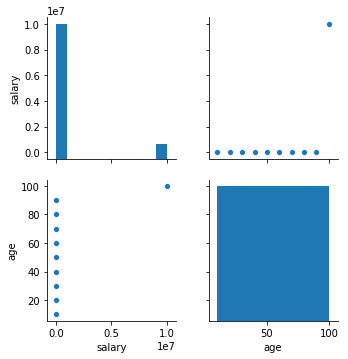

In [18]:
sns.pairplot(data)

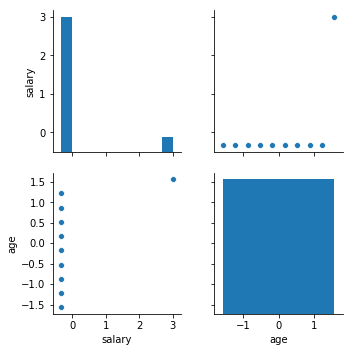

In [74]:
data_sc = pd.DataFrame(np.hstack((salary_sc,age_sc)),columns=['salary','age'])
sns.pairplot(data_sc)

In [ ]:
#sns.distplot(salary_mms,hist=True,kde=True)

In [ ]:
#sns.distplot(age_mms,hist=True,kde=True)

In [ ]:
#sns.distplot(salary_mms,hist=True,kde=True)

# Titanic  Dataset

In [19]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
df2 = df[['survived','pclass','age','fare']]
df2.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [22]:
df2.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [23]:
df3 = df2.fillna(df2.mean())

In [24]:
x=df3.drop("survived",axis=1)
y=df3["survived"]
print('shape of x=',x.shape)
print('shape of y=',y.shape)

shape of x= (891, 3)
shape of y= (891,)


# Standardization  z-score 

In [25]:
sc = StandardScaler()
sc.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
sc.mean_

array([ 2.30864198, 29.69911765, 32.20420797])

In [27]:
sc.scale_

array([ 0.83560193, 12.99471687, 49.66553444])

In [28]:
x.describe()

,pclass,age,fare
count,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.910400
50%,3.000000,29.699118,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


In [29]:
x_sc=sc.transform(x)
x_sc

array([[ 0.82737724, -0.5924806 , -0.50244517],
       [-1.56610693,  0.63878901,  0.78684529],
       [ 0.82737724, -0.2846632 , -0.48885426],
       ...,
       [ 0.82737724,  0.        , -0.17626324],
       [-1.56610693, -0.2846632 , -0.04438104],
       [ 0.82737724,  0.17706291, -0.49237783]])

In [30]:
x_sc = pd.DataFrame(x_sc,columns=['pclass','age','fare'])
x_sc.describe()

,pclass,age,fare
count,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,2.562796e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.253155e+00,-6.484217e-01
25%,-3.693648e-01,-5.924806e-01,-4.891482e-01
50%,8.273772e-01,0.000000e+00,-3.573909e-01
75%,8.273772e-01,4.079260e-01,-2.424635e-02
max,8.273772e-01,3.870872e+00,9.667167e+00


In [31]:
x_sc.head()

,pclass,age,fare
0,0.827377,-0.592481,-0.502445
1,-1.566107,0.638789,0.786845
2,0.827377,-0.284663,-0.488854
3,-1.566107,0.407926,0.420730
4,0.827377,0.407926,-0.486337


In [32]:
x_sc.describe().round(2)

,pclass,age,fare
count,891.00,891.00,891.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.57,-2.25,-0.65
25%,-0.37,-0.59,-0.49
50%,0.83,0.00,-0.36
75%,0.83,0.41,-0.02
max,0.83,3.87,9.67


# Min-Max Normalization

In [33]:
mmc = MinMaxScaler()

In [34]:
mmc.fit(x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
mmc.scale_

array([0.5       , 0.01256597, 0.00195187])

In [36]:
x.describe()

,pclass,age,fare
count,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.910400
50%,3.000000,29.699118,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


In [37]:
x_mmc = mmc.transform(x)

In [38]:
x_mmc = pd.DataFrame(x_mmc,columns=['pclass','age','fare'])
x_mmc.describe()

,pclass,age,fare
count,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.062858
std,0.418036,0.163383,0.096995
min,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.015440
50%,1.000000,0.367921,0.028213
75%,1.000000,0.434531,0.060508
max,1.000000,1.000000,1.000000


In [39]:
x_mmc.describe().round(2)

,pclass,age,fare
count,891.00,891.00,891.00
mean,0.65,0.37,0.06
std,0.42,0.16,0.10
min,0.00,0.00,0.00
25%,0.50,0.27,0.02
50%,1.00,0.37,0.03
75%,1.00,0.43,0.06
max,1.00,1.00,1.00


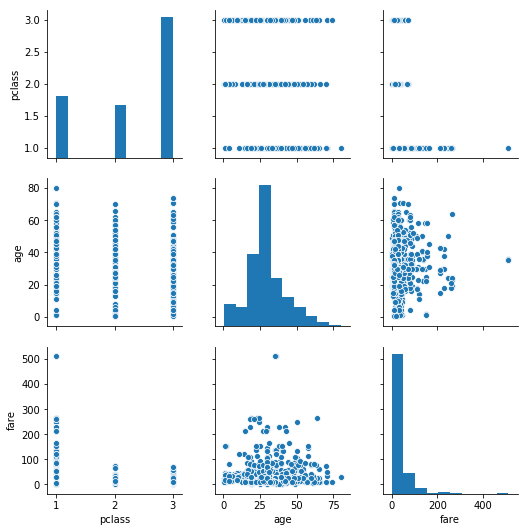

In [40]:
sns.pairplot(x)

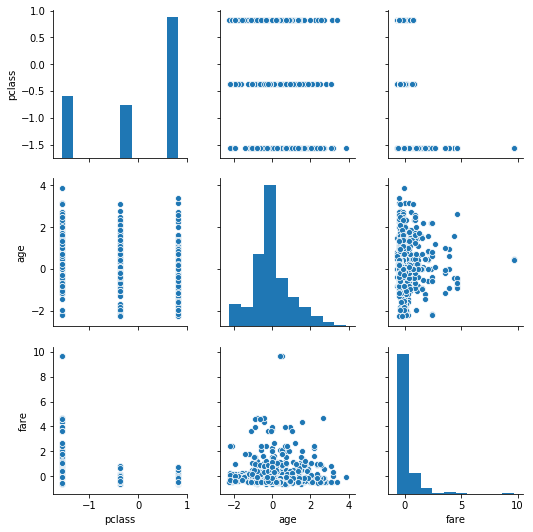

In [41]:
sns.pairplot(x_sc)

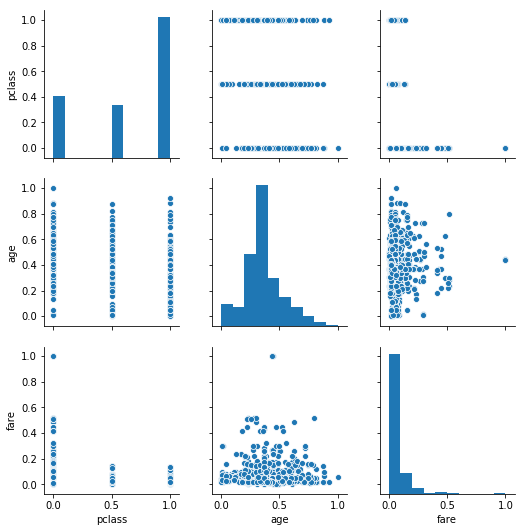

In [42]:
sns.pairplot(x_mmc)

In [ ]:
from sklearn import datasets
d = datasets.load_iris()

# Min-Max Normalization

In [ ]:
scaling1 = MinMaxScaler()

In [ ]:
scaling1.fit_transform(data['data'])

# Z-Score Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaling2 = StandardScaler()

In [ ]:
scaling2.fit_transform(age)

# 产生随机数

In [ ]:
np.random.seed(1)
age = np.random.randint(10)*100+1
salary = np.random.rand(1000)*10000+2000
age
salary

In [ ]:
d={'age':age, 'salary':salary}
data = pd.DataFrame(d)
sns.pairplot(data)

In [ ]:
def logistic(x):
    return 1.0/(1+np.exp(-x))

In [ ]:
x = np.linspace(-3,3,1000)  #(-6,6,1000)
y = logistic(x)

In [ ]:
plt.plot(x,y)

#iris dataset

In [ ]:
from sklearn import datasets
d = datasets.load_iris()

In [ ]:
d = datasets.load_iris()

In [ ]:
X = d['data']
#print(X)

Normalization

In [ ]:
scaling = MinMaxScaler()

In [ ]:
scaling.fit_transform(X)


In [ ]:
=pd.read_csv('.csv')
.head()

In [ ]:
scaling = MinMaxScaler()

In [ ]:
scaling.fit_transform(df[['','']])

# Standardization(Z-score normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaling = StandardScaler()

In [ ]:
scaling.fit_transform(X)

In [ ]:
X_scaled = scaling.fit_transform(X)
col=X_scaled[:,0]

In [ ]:
np.var(col)